In [3]:
"""
Dataset:

Subreddit content and binary stress indicator dataset:
https://www.kaggle.com/datasets/kreeshrajani/human-stress-prediction/data

Research Questions:

- How feasible is it to build an NLP model which successfully predicts stress
  based on subreddit content?
- Does the accuracy of the model predictions vary by subreddit topic/theme?
- Does the likelihood of poster exhibiting stress vary by time of day?

What we are going to do:

1) Data exploration, word cloud (together so we all understand the dataset)
2) Preprocessing:
    - feature engineering
    - tokenisation, vectorisation etc
    - dealing with the timestamp variable
    - simplifying the subreddit topics
3) Model building – sentiment analysis neural network predicting
    - 1 = stress, 0 = no stress
4) Model testing – train, test, split
5) Assess performance – accuracy
6) Stratification:
    - By theme
    - By time of day
7) Visualisation
8) Discuss and describe outputs and potential uses
    (ideally with reference to existing literature on stress and social media)

Outputs:

- Stress prediction model
- Recommendations for potential uses e.g. healthcare
- Visualisation of analysis of the relationship between 'stress-posting' and
  time of day or subreddit theme

Work on the projects:

Approach/Method:

"""
### environment required

"\nDataset:\n\nSubreddit content and binary stress indicator dataset:\nhttps://www.kaggle.com/datasets/kreeshrajani/human-stress-prediction/data\n\nResearch Questions:\n\n- How feasible is it to build an NLP model which successfully predicts stress \n  based on subreddit content?\n- Does the accuracy of the model predictions vary by subreddit topic/theme?\n- Does the likelihood of poster exhibiting stress vary by time of day?\n\nWhat we are going to do:\n\n1) Data exploration, word cloud (together so we all understand the dataset)\n2) Preprocessing:\n    - feature engineering\n    - tokenisation, vectorisation etc\n    - dealing with the timestamp variable\n    - simplifying the subreddit topics\n3) Model building – sentiment analysis neural network predicting\n    - 1 = stress, 0 = no stress\n4) Model testing – train, test, split\n5) Assess performance – accuracy\n6) Stratification:\n    - By theme\n    - By time of day\n7) Visualisation\n8) Discuss and describe outputs and potential 

In [7]:
### Import Libararies
import numpy as np
import pandas as pd
import time ##for processing epoch times
from wordcloud import WordCloud, STOPWORDS
import string
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers import TextVectorization

from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers import TextVectorization

from tensorflow.keras.callbacks import EarlyStopping

In [8]:
### Read in data
data = pd.read_csv("Stress.csv")

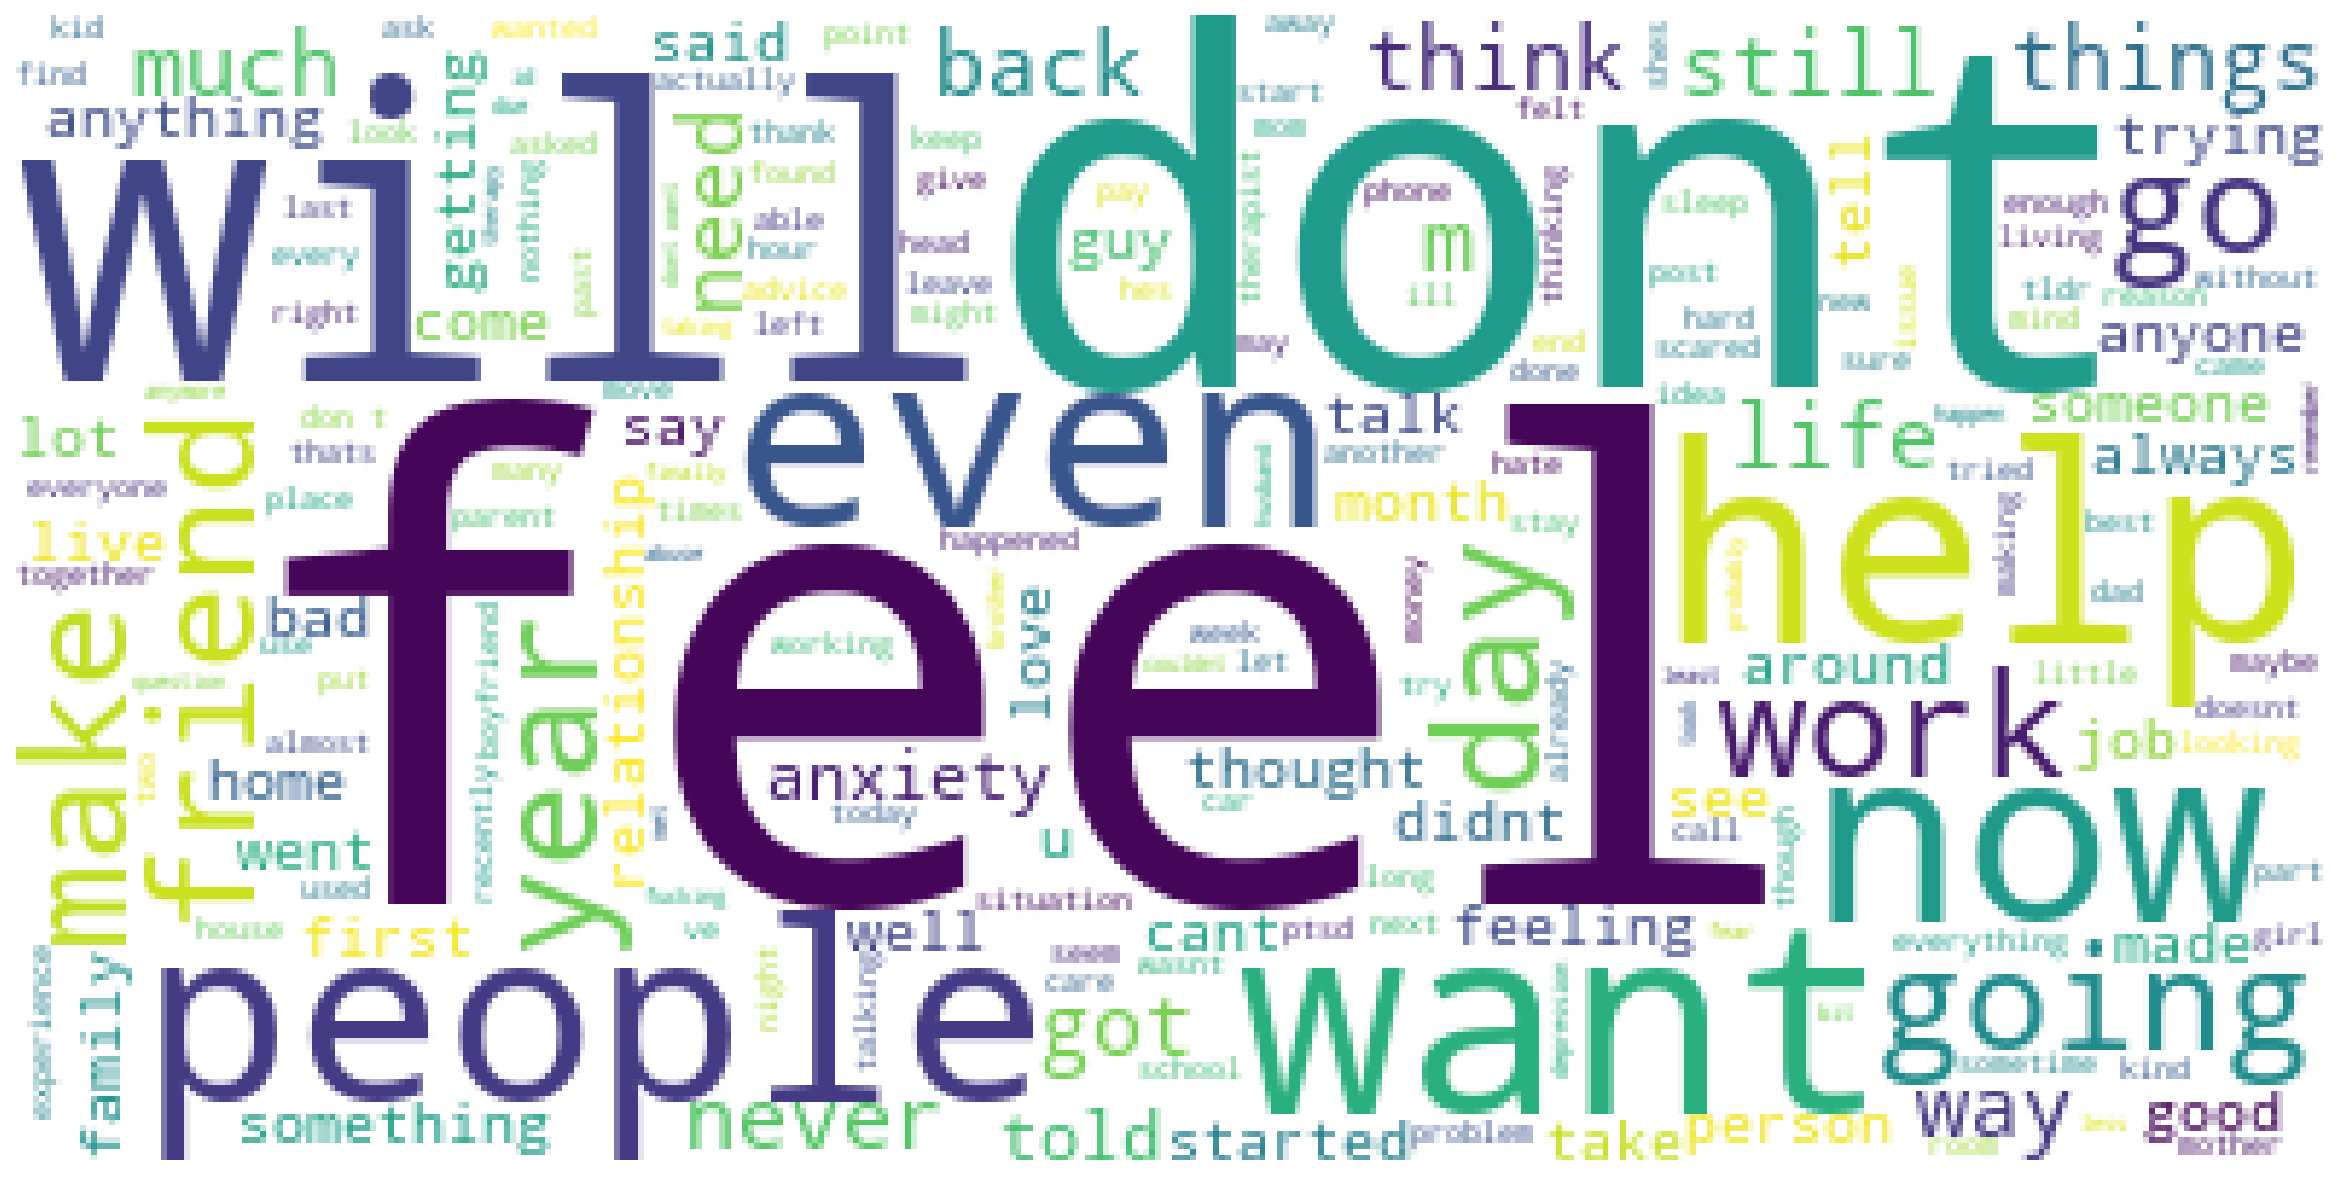

In [9]:
### Data Exploration
data.head()
# Convert rows into one big piece of text
full_text = ''.join(data['text'].tolist())

# Stopwords list
stopwords = set(STOPWORDS)
custom_stopwords = ["really","im","ive","thing","time","know","one","s"]
stopwords.update(custom_stopwords)

# Tokenize the text
tokens = full_text.split()
# Map punctuation
punctuation_mapping_table = str.maketrans('', '', string.punctuation)
# Strip tokens of punctuation
tokens_stripped_of_punctuation = [token.translate(punctuation_mapping_table)
                                  for token in tokens]
# Convert to lower case
lower_tokens = [token.lower() for token in tokens_stripped_of_punctuation]
# Revert to one single string
joined_string = (" ").join(lower_tokens)
# Make the wordcloud
wordcloud = WordCloud(background_color = 'white',
                      stopwords = stopwords).generate(joined_string)

# We set the size of the figure
plt.figure(figsize=(30,40))

# Turn off axes
plt.axis("off")

# Then use imshow to plot an image (here, our wordcloud)
plt.imshow(wordcloud)


From the wordcloud, it does not seem that subreddits explicitly contain the word 'stress'.

Words seen that could be relevant include feel, hard, work, relationship, anxiety.

In [13]:
### Data preparation
data.dtypes

subreddit            object
post_id              object
sentence_range       object
text                 object
label                 int64
confidence          float64
social_timestamp      int64
dtype: object

In [14]:
### Feature Engineering (epoch time)
# convert the time in seconds since the epoch to a readable format
data['time'] = pd.to_datetime(
    data['social_timestamp'], unit='s', utc=True
).dt.tz_convert(tz="US/Eastern")

data['hour'] = pd.to_datetime(data['time']).dt.hour

data.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,time,hour
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353,2018-03-21 02:39:13-04:00,2
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817,2018-05-22 13:23:37-04:00,13
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605,2018-09-02 20:46:45-04:00,20
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555,2018-01-20 01:25:55-05:00,1
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005,2018-10-17 16:43:25-04:00,16


In [15]:
### Feature Engineering (subreddit themes)
data['subreddit'].unique()
##array(['ptsd', 'assistance', 'relationships', 'survivorsofabuse',
       ##'domesticviolence', 'anxiety', 'homeless', 'stress',
       ##'almosthomeless', 'food_pantry'], dtype=object)

array(['ptsd', 'assistance', 'relationships', 'survivorsofabuse',
       'domesticviolence', 'anxiety', 'homeless', 'stress',
       'almosthomeless', 'food_pantry'], dtype=object)

In [ ]:
### Data split into train, test, valid

In [ ]:
### Data Normalisation process

In [ ]:
### Stress Level Model building

# Specify
batch_size = 32
seed = 42


In [ ]:
### Model Validation Process with Metrics